In [2]:
#Geral
import numpy as np
import pandas as pd
import os

#Visualizações
import matplotlib.pyplot as plt
%matplotlib inline

#Datas
from datetime import datetime

Informações gerais do dataset

In [3]:
# Importando dataset
df = pd.read_csv('Bitcoin Tweets.csv')
df

C:\Users\felip\AppData\Local\Temp\ipykernel_7992\3300278233.py:1: DtypeWarning: Columns (4,5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Bitcoin Tweets.csv')


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029113,Xannyx Airdrops,NaN,@pandagirltoken,2021-08-03 12:50:28,108.0,632.0,580.0,False,2022-04-17 18:43:13,@Poloniex you heard about pandacoin? The only ...,"['pandagirl', 'nft', 'nftart', 'giveaway', 'BT...",Twitter for Android,False
3029114,Gangsta monkey,NaN,#nft #cro #crofam #nfts #opensea #btc #eth,2020-09-01 13:24:09,1658.0,3079.0,4689.0,False,2022-04-17 18:43:12,https://t.co/48ON3490ju\nfriends the new airdo...,"['BTC', 'Ethereum', 'AirdropCrypto', 'crypto',...",Twitter Web App,False
3029115,Pikachu,NaN,My bio no one can understand 🤫 #CRO,2021-05-02 15:33:12,20.0,213.0,222.0,False,2022-04-17 18:43:10,@OfficialTravlad Biggest easter Egg giveaway s...,"['BNB', 'BSC', 'NFT', 'NFTCommunity', 'bsCGems...",Twitter for Android,False
3029116,🅱️🅰️🆃🅼🅰️🅽 ®️,NaN,Shift Token Visuals📸\n\n🇸 🇭 🇮 🇫 🇹 🇹 🇴 🇰 🇪 🇳,2008-10-29 00:42:25,125.0,175.0,2902.0,False,2022-04-17 18:43:09,@TheMoonCarl 🏋️ #SHIFT - $SHIFT\n🏋️ #SHIFTFIT ...,"['SHIFT', 'SHIFTFIT', 'SHIFTNATION', 'SHIFTAPP...",Twitter for Android,False


Localização do usuário

In [4]:
# Tratando o caractere especial '$'
df0 = df
df0['user_location'] = df0['user_location'].str.replace('$', '\\$')
df0=df0[['user_location']]#[0:20000]
df0.value_counts()

C:\Users\felip\AppData\Local\Temp\ipykernel_7992\1624536273.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df0['user_location'] = df0['user_location'].str.replace('$', '\\$')


user_location      
United States          36086
New York, USA          21863
London, England        20147
Bay Area, CA           18134
Global                 17575
                       ...  
Pittsburgh,  PA            1
Cartaxo, Portugal          1
Cartanal                   1
Pittsburgh, PA  USA        1
NOMAD/Gypsyville           1
Length: 74923, dtype: int64

<AxesSubplot:xlabel='user_location'>

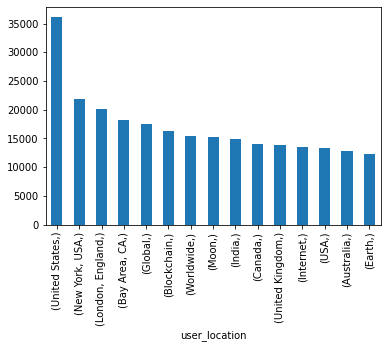

In [5]:
df0.value_counts()[:15].plot.bar()

# Insight
# Países de língua inglesa são predominantes

Tweet/retweet source

In [74]:
df1_1 = df[['source','is_retweet']]
df1_1 = df1_1[df1_1['is_retweet'] == True]
df1_1.shape

# Insight
# Não existem retweets no dataset, embora exista o campo "is_retweet"

(0, 2)

<AxesSubplot:>

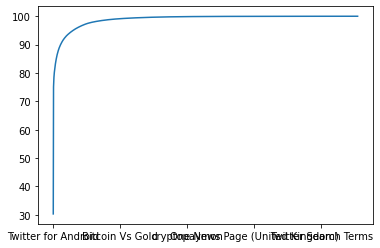

In [161]:
# Soma cumulativa dos tweets por fonte ('source')
df1_2 = df[['source']]
(df1_2["source"].value_counts().cumsum()/df1_2["source"].value_counts().sum()*100).plot()

In [86]:
df1=df[['source']]#[0:20000]
df1.value_counts()[:20]

# Insight
# Twitter android + IOS + Web App ~= 2.250.000 tweets
# Aproximadamente 25% das respostas são automáticas 

source                  
Twitter for Android         916751
Twitter Web App             777275
Twitter for iPhone          576690
IFTTT                        44852
dlvr.it                      33953
TweetDeck                    23269
ContentStudio.io             21851
Twitter for iPad             18436
HoBaBot                      13137
Hootsuite Inc.               12438
exchangewhales               12371
DYORCryptoBot                11875
Bitcoin Whale Alert          11439
Buffer                       11186
vaiotapi                     10972
bitcoinagile                 10877
CoinTweety                    9991
Twibble.io                    9802
Microsoft Power Platform      8679
Pamboo Crypto                 8488
dtype: int64

Horário de publicação

In [80]:
# Horário de Verão Central - Chicago (GMT-5)
# Horário de Verão das Montanhas - Denver (GMT-6)
# Horário Padrão das Montanhas - Phoenix (GMT-7)
# Horário de Verão do Pacífico - Los Angeles (GMT-8) - Sede da Twitter


# Tratamento das datas de publicação
df2 = df[(df['date'] >= '2021-02-05 10:52:04') & (df['date'] < '2022-05-01 00:00:00')]

# Analisando apenas EUA, para entender as faixas de atividade
df2 = df2[['user_location', 'date']]
df2_1 = df2[(df2['user_location'].str.contains('USA') == True) | (df2['user_location'].str.contains('United States') == True)]
df2_2 = df2_1[['date']]

(array([10383.,  5877.,  4799.,  8113.,  7753., 12294., 26981., 18116.,
        16141., 21399.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

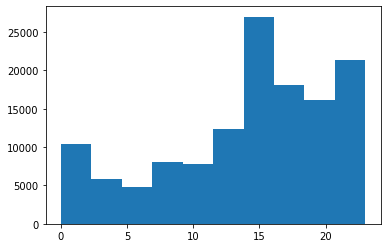

In [79]:
# Extraindo a hora
df2_2 = pd.to_datetime(df2_2.stack())
df2_3 = df2_2.dt.hour

# Visualização
plt.hist(df2_3)

# Insight
# Maior volume de tweets acontece na parte da tarde/noite

Perfis relacionados ao Bitcoin

In [9]:
# Analisando nomes e descrições
df3 = df[['user_name', 'user_description']]

# Palavras chave
words = ['btc', 'BTC', 'Btc', 'Bitcoin', 'BITCOIN', 'bitcoin', 'crypto', 'CRYPTO', 'Crypto']
df3 = df3[(df3['user_name'].str.contains('|'.join(words)) == True) | (df3['user_description'].str.contains('|'.join(words)) == True)]

# Número de correspondências
df3_1 = df[['user_name']]
df3_1['user_name'].value_counts().sum()

# Percentual
(df3['user_name'].value_counts().sum() / df3_1['user_name'].value_counts().sum())*100

# Insight
# Aproximadamente 50% dos perfis do dataset são perfis relacionados ao bitcoin e/ou outras cripto moedas

51.36273735287234

Sazonalidade

Tempo de conta